## Implementando um Classificador SVM em Python

1. Carregando as bibliotecas necessárias:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


2. Carregando o dataset Iris para ser utilizado:

In [3]:
from sklearn.datasets import load_iris
data = load_iris()
iris = pd.DataFrame(data['data'],columns=data.feature_names)
target = data.target

3. Instanciação Simples do Classificador:

In [4]:
# Importando o algoritmo de SVM
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
svc = SVC(gamma="auto")

4. Testando o modelo "svc" na nossa base "iris:

In [5]:
cv_result = cross_val_score(svc,iris,target,cv=10,scoring='accuracy')

5. Retornaa a acurácia em porcentagem do nosso modelo:

In [6]:
print(f"Acurácia com cross validation: {cv_result.mean()*100:.2f}% ")

Acurácia com cross validation: 98.00% 


6. Treinar o modelo com o dataset inteiro e prever um valor inédito:

In [7]:
svc.fit(iris,target)
# Predizer a que classe pertencerá a flor com sépala de comprimento 6.9 cm e largura 2.8 cm  e com pétala de comprimento 6.1 cm e largura 2.3cm:
svc.predict([[6.9, 2.8, 6.1, 2.3]])

C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])

7. Visualizar os dados e os hiperplanos definidos pelo modelo:

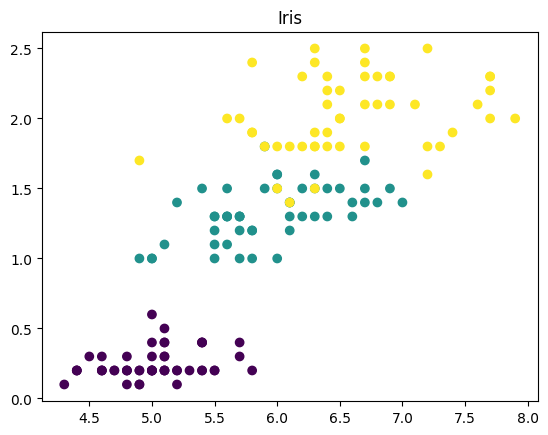

In [9]:
plt.scatter(iris['sepal length (cm)'],iris['petal width (cm)'],c=target)
plt.title('Iris')
plt.show()

8. Visualizando os Hiperplanos e os Outliers:

C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


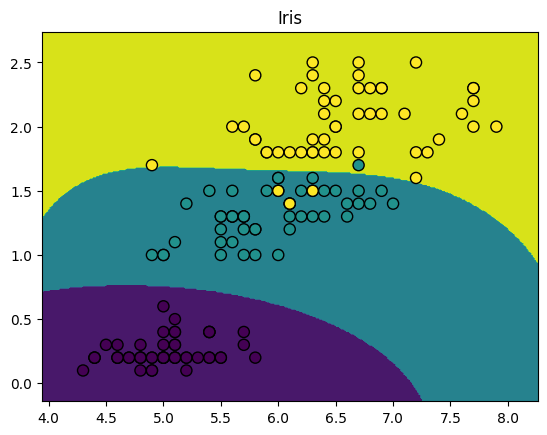

In [11]:
x0_min,x0_max = iris['sepal length (cm)'].min(), iris['sepal length (cm)'].max()
x1_min,x1_max = iris['petal width (cm)'].min(), iris['petal width (cm)'].max()
w = x0_max - x0_min
h = x1_max - x1_min
x0, x1 = np.meshgrid(np.linspace(x0_min - .1*w,x0_max + .1*w,300),np.linspace(x1_min - .1*h,x1_max + .1*h,300))
svc.fit(iris[['sepal length (cm)', 'petal width (cm)']], target)
ypred = svc.predict(np.c_[x0.reshape(-1,1), x1.reshape(-1,1)])
ypred = ypred.reshape(x0.shape)
plt.contourf(x0, x1, ypred)
plt.scatter(iris['sepal length (cm)'], iris['petal width (cm)'], c=target, s=64, edgecolors='k')
plt.title('Iris')
plt.show()